# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

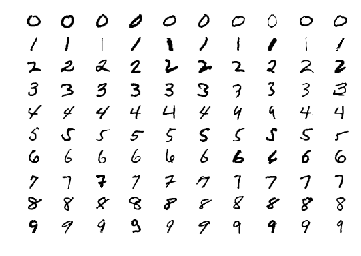

In [3]:
### STUDENT START ###
def P1(num_examples=10):
    # Set a black on white colormap.
    plt.rc('image', cmap='binary', interpolation='none')
    
    # extract examples for each digit from raw shuffled data
    count = 0
    for i in range(10):
        loc = np.where(Y == i)
        examples = X[loc]
        # for each digit, extract first 10 examples
        for index in range(num_examples):
            # reshape a 1D feature vector into a 2D matrix for plotting
            image = examples[index].reshape((28,28))
            # create subplots, 10 rows and 10 columns
            plt.subplot(10, 10, count+1) 
            plt.axis('off')
            # plot numpy arrays as image
            plt.imshow(image)
            # plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
            count += 1
        
P1(10)
### STUDENT END ###

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
### STUDENT START ###
def P2(k_values):
    for k in k_values:
        # create a K-Nearest_neighbors classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        # learn the digits using mini training set
        knn.fit(mini_train_data,mini_train_labels)
        # predict on the dev set for evaluation
        pred = knn.predict(dev_data)
        # report accuracy on the dev set ?? vs. pred above
        print("K-Nearest-Neighbors accuracy with %s neighbors is:" % k,knn.score(dev_data,dev_labels))
        # show classification report when k=1
        if k==1:
            print("Classification report for classifier %s:\n%s\n" 
                   % (knn, classification_report(dev_labels, pred))) 

k_values = [1, 3, 5, 7, 9]
P2(k_values)
### STUDENT END ###

K-Nearest-Neighbors accuracy with 1 neighbors is: 0.888
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000


K-Nearest-Neighbors accuracy with 3 neighbors is: 0.878
K-Nearest-Neighbors accuracy with 5 neighbors 

ANSWER: The most difficult digit is 9 based on f1-score.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
### STUDENT START ###
def P3(train_sizes, accuracies):
    for s in train_sizes:
        # create a K-Nearest_neighbors classifier
        knn = KNeighborsClassifier(n_neighbors=1)
        # calculate the time elapsed for the whole prediction process with different training size
        start_time = time.time()
        # learn the digits using a subset of the training set with the training size specified
        knn.fit(train_data[:s],train_labels[:s])
        # predict on the dev set for evaluation
        pred = knn.predict(dev_data)
        elapsed_time = time.time() - start_time
        # report accuracy on the dev set
        print("K-Nearest-Neighbors accuracy with %s training size is:" % s,knn.score(dev_data,dev_labels))
        print("Time needed for prediction with training size %s is: %.2f seconds." % (s, elapsed_time))
        print()
        accuracies.append(round(knn.score(dev_data,dev_labels),4))
    return accuracies
    
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)
### STUDENT END ###

K-Nearest-Neighbors accuracy with 100 training size is: 0.72
Time needed for prediction with training size 100 is: 0.12 seconds.

K-Nearest-Neighbors accuracy with 200 training size is: 0.786
Time needed for prediction with training size 200 is: 0.22 seconds.

K-Nearest-Neighbors accuracy with 400 training size is: 0.841
Time needed for prediction with training size 400 is: 0.48 seconds.

K-Nearest-Neighbors accuracy with 800 training size is: 0.884
Time needed for prediction with training size 800 is: 0.91 seconds.

K-Nearest-Neighbors accuracy with 1600 training size is: 0.902
Time needed for prediction with training size 1600 is: 1.94 seconds.

K-Nearest-Neighbors accuracy with 3200 training size is: 0.926
Time needed for prediction with training size 3200 is: 3.80 seconds.

K-Nearest-Neighbors accuracy with 6400 training size is: 0.937
Time needed for prediction with training size 6400 is: 7.80 seconds.

K-Nearest-Neighbors accuracy with 12800 training size is: 0.959
Time needed fo

[0.71999999999999997,
 0.78600000000000003,
 0.84099999999999997,
 0.88400000000000001,
 0.90200000000000002,
 0.92600000000000005,
 0.93700000000000006,
 0.95899999999999996,
 0.96999999999999997]

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [6]:
### STUDENT START ###
# to simplify the task, use Q3's train_size data and accuracies to fit the regression model
def P4():
    # convert X, y into matrix and array respectively
    Y_accuracies = np.array(accuracies)
    X_size = np.array(train_sizes).reshape(-1, 1)
    # fit a regression model
    lr = LinearRegression()
    lr.fit(X_size, Y_accuracies)
    print("Simple Linear Regression Model: Y = %.3f + %.6f * X" % (lr.intercept_, lr.coef_[0]))
    # predict for n=60000
    n = 60000
    lr_pred = lr.predict(n)
    print('Accuracy prediction for training size 60000 from the simple regression model is %.3f' % lr_pred)
    print()
    
    # The above forecast accuracy is greaterh than 1 which is problematic
    # Then we try to transform X variable, using the inverse form: Y=1- b*(1/X) or 1-Y = b*(1/X)
    lr2 = LinearRegression(fit_intercept = False)
    lr2.fit(1/X_size, 1-Y_accuracies)
    print("After Tranform Variables: Y = 1 - %.3f * (1/X)" % lr2.coef_[0])
    lr2_pred = 1 - lr2.coef_[0]*(1/n)
    print('Accuracy prediction for training size 60000 from model with tranformed variables is %.3f' % lr2_pred)

P4()
### STUDENT END ###

Simple Linear Regression Model: Y = 0.843 + 0.000007 * X
Accuracy prediction for training size 60000 from the simple regression model is 1.243

After Tranform Variables: Y = 1 - 33.834 * (1/X)
Accuracy prediction for training size 60000 from model with tranformed variables is 0.999


**[Review Comments] ** should use logit transformation, odds, x/(1+x)

ANSWER: The simple linear model will not ensure the accuracy prediction fall in the range [0, 1] as the accuracy will increase linearly with the sample size. Thus, we could tranform the variables and model is in the form of Y = 1 - a* (1/X) so that prediction will always be in [0, 1] range.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [7]:
### STUDENT START ###
def P5():
    # create a K-Nearest_neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    # learn the digits using mini training set
    knn.fit(mini_train_data,mini_train_labels)
    # predict on the dev set for evaluation
    pred = knn.predict(dev_data)
    # By definition, entry i, j in a confusion matrix is 
    # the number of observations actually in group i, but predicted to be in group j
    cnf = confusion_matrix(dev_labels, pred)
    print("Confusion matrix: ")
    print(cnf)
    print('\nThe most confused pair of digits are 4 and 9.')
    
    # show five examples of mistakes
    print('\nBelow are five examples of misclassificaiton: ')
    num_example = 0
    for i in range(pred.shape[0]):
        if pred[i] != dev_labels[i]:
            print('prediction is %.1f and true label is %.1f.' % (pred[i], dev_labels[i]))
            num_example += 1
        if num_example > 5:
            break
P5()
### STUDENT END ###

Confusion matrix: 
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

The most confused pair of digits are 4 and 9.

Below are five examples of misclassificaiton: 
prediction is 4.0 and true label is 9.0.
prediction is 3.0 and true label is 8.0.
prediction is 4.0 and true label is 6.0.
prediction is 6.0 and true label is 0.0.
prediction is 1.0 and true label is 7.0.
prediction is 7.0 and true label is 9.0.


(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

**[Review Comments]** Could use grid function to simply finding the neighbors of the pixel?

In [8]:
#def P6():
    
### STUDENT START ###

def cal_distance(neighbor_matrix, sigma):
    # calculate Gaussian distance which will be used as weights
    # initialize a 3*3 distance matrix; the center (1,1) will be the particular pixel we're smoothing
    dist = np.zeros((3,3))
    # calculate the distance of each item in the neighbor matrix to the center using Guassian function
    for i in range(3):
        for j in range(3):
            x = abs(i - 1)
            y = abs(j - 1)
            dist[i, j] = 1/(2*np.pi*sigma**2)*np.exp(-(x**2+y**2)/2*sigma**2)
    return dist


def Guassian_blur(digit, r, c): # parameter digit is 28*28 matrix, representing one digit
    '''This function find the 8 neighbors of a pixel and calculated the weighted average
    for this pixel.'''
    
    # first, find the neighbors of the pixel
    # initialize a 3*3 neighbor matrix
    neighbor = np.zeros((3,3))
    for x in range(3):
        for y in range(3):
            # if the pixel is on the edge of original image or the neighbor is out of 
            # the range of the original image, we use 0.
            if r-1+x == 0 or c-1+y == 0 or r-1+x > digit.shape[0]-1 or c-1+y > digit.shape[1]-1:
                neighbor[x,y]=0
            else:
                neighbor[x,y] = digit[r-1+x, c-1+y]
            
    # next, calculate the distance of each item of the neighbor matrix to the pixel
    dist = cal_distance(neighbor, digit.std())
    
    # then calculate the weighted average of neighbors as the smoothed value of the pixel
    smoothed_pixel = np.sum(neighbor * dist)/np.sum(dist)
    return smoothed_pixel

def blur_preprocess(data): # parameter data is an array
    '''apply Guassian_blur process to each pixel of the digit'''
    
    # initialize an array for the preprocessed data
    processed_data = np.zeros((data.shape[0],data.shape[1]))
    # loop through each row of the data which is a digit
    for i in range(data.shape[0]):
        blurred_img = np.zeros((28,28))
        # for each pixel in the digit, apply Guassian_blur process;
        # and stored the output in blurred_img matrix
        for r in range(28):
            for c in range(28):
                blurred_img[r, c] = Guassian_blur(data[i].reshape(28,28), r, c)
        # reshape blurred_img to an array and stored it to processed_data
        processed_data[i] = blurred_img.reshape(784)
    return processed_data

# to save some time, use mini_train_data set instead of train_data
# for below evaluation
processed_mini_train_data = blur_preprocess(mini_train_data)
processed_dev_data = blur_preprocess(dev_data)

# 0. no blurring preprocessing
knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(mini_train_data,mini_train_labels)
print("K-Nearest_Neighbors accuray: ")
print("1. No blurring processing: ",knn3.score(dev_data,dev_labels))

# 1. preprocessing training data but not dev
knn4 = KNeighborsClassifier(n_neighbors=1)
knn4.fit(processed_mini_train_data,mini_train_labels)
print("1. preprocess the training data but not dev data: ",knn4.score(dev_data,dev_labels))

# 2. preprocessing dev but not training
knn5 = KNeighborsClassifier(n_neighbors=1)
knn5.fit(mini_train_data,mini_train_labels)
print("2. preprocess the dev data but not training data: ",knn5.score(processed_dev_data,dev_labels))

# 3. preprocessing both training and dev data
knn6 = KNeighborsClassifier(n_neighbors=1)
knn6.fit(processed_mini_train_data,mini_train_labels)
print("3. preprocess both training and dev data: ",knn6.score(processed_dev_data,dev_labels))
        
### STUDENT END ###

#P6()

K-Nearest_Neighbors accuray: 
1. No blurring processing:  0.888
1. preprocess the training data but not dev data:  0.909
2. preprocess the dev data but not training data:  0.872
3. preprocess both training and dev data:  0.902


ANSWER: Using mini_train_data to fit the model and dev_data to evaluate the accurary, the accuracy is the below orders: smoothing dev data only < none smoothing < smoothing both dev and training data < smoothing training data only.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [9]:
### STUDENT START ###
def P7():
    # binary-valued features, use BernoulliNB
    # feature X already in range [0,1], use binarize argument
    # to map pixel values to 0 or 1
    bern = BernoulliNB(binarize=0.5) # by default alpha=1.0
    bern.fit(mini_train_data,mini_train_labels)
    print('Bernoulli accuracy: %3.2f' % bern.score(dev_data, dev_labels))

    # MultinomialNB
    mult = MultinomialNB()
    # map pixel values to 0, 1 or 2
    mult.fit(np.floor(mini_train_data*2),mini_train_labels)
    print('Multinomial accuracy: %3.2f' % mult.score(dev_data, dev_labels))
    # print('Multinomial accuracy: %3.2f' % mult.score(np.floor(dev_data*2), dev_labels))

P7()
### STUDENT END ###

Bernoulli accuracy: 0.81
Multinomial accuracy: 0.80


**[Review Comments]** Can use other threshold for mapping pixel values into two or three buckets.

ANSWER: The multi-class version didn't improve the results. When map pixel to binary values, only about 13% of the mini_train_data has value 1; when map pixel to multiple classes, 0 and 1 percentages are similar to binary situation and only 0.66% of the sample has value 2. Thus, multi-class won't help improve the prediction.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [12]:
### STUDENT START ###
def P8(alphas):
    bern = BernoulliNB(binarize=0.5)
    gs = GridSearchCV(bern, alphas)
    gs.fit(mini_train_data,mini_train_labels)
    # if use dev data, the accuracy is 0.818 for alpha = 0.01
    print('The best value is ', gs.best_params_, 'and the accuracy is ', gs.best_score_)
    return gs.grid_scores_

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print('\nBelow is the grid of all scores.')
nb

### STUDENT END ###

C:\Users\cyhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\cyhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\cyhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:785: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\cyhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


The best value is  {'alpha': 0.01} and the accuracy is  0.821

Below is the grid of all scores.


[mean: 0.09200, std: 0.00080, params: {'alpha': 0.0},
 mean: 0.81800, std: 0.02216, params: {'alpha': 0.0001},
 mean: 0.82000, std: 0.02073, params: {'alpha': 0.001},
 mean: 0.82100, std: 0.01811, params: {'alpha': 0.01},
 mean: 0.81500, std: 0.02013, params: {'alpha': 0.1},
 mean: 0.80000, std: 0.01188, params: {'alpha': 0.5},
 mean: 0.79500, std: 0.01145, params: {'alpha': 1.0},
 mean: 0.78400, std: 0.01934, params: {'alpha': 2.0},
 mean: 0.72000, std: 0.02495, params: {'alpha': 10.0}]

ANSWER: The best value for alpha is 0.01. The accuracy of alpha =0 is only 0.092. Though I expect accuracy with zero alpha would be lower than that with small alpha but 0.092 is much lower than I expected.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

**[Review Comments]** Solution is to add some noises either by add random numbers to the sigma or replace all sigma with a small constant. I think the reason is that we do expect some variations to the mean value, not all zero.

Before adjustment Gaussian accuracy is: 0.62

After adjustment Gaussian accuracy is: 0.80

Theta and Sigma Distribution Before Adjustment:


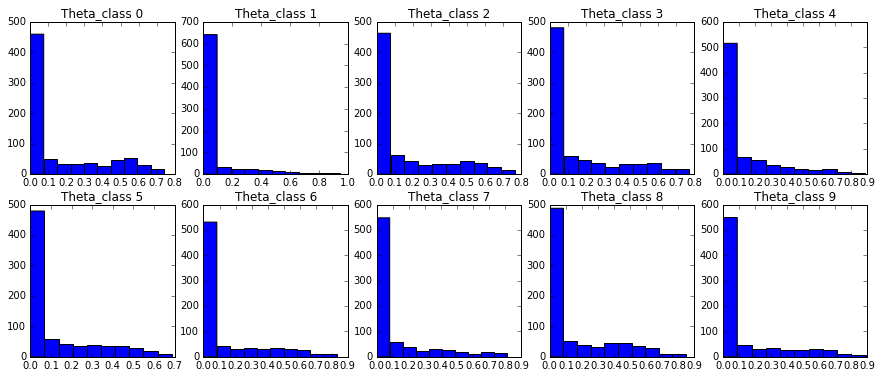

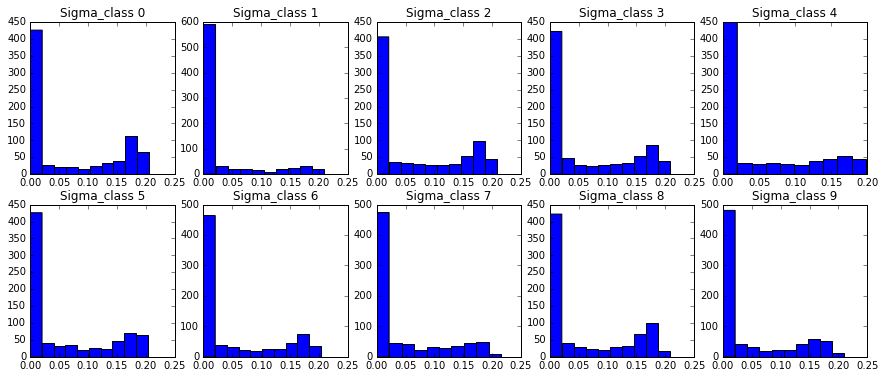

In [13]:
### STUDENT END ###
def P9():
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    print('Before adjustment Gaussian accuracy is: %3.2f' % gnb.score(dev_data, dev_labels))
    #check mean of each feature per class
    plt.figure(figsize=(15, 6))
    for i in range(10):
        fig = gnb.theta_[i]
        plt.subplot(2,5, i+1)
        plt.hist(fig)
        plt.title('Theta_class %s' % i)
    # check variance of each feature per class
    plt.figure(figsize=(15, 6))
    for i in range(10):
        fig = gnb.sigma_[i]
        plt.subplot(2,5, i+1)
        plt.hist(fig)
        plt.title('Sigma_class %s' % i)
    
    # add some noises to theta and sigma so that all features have variability
    # and most of feature values are positive
    sigma_step = 0.01
    theta_step = 0.1
    gnb.theta_ += theta_step
    gnb.sigma_ += sigma_step
    print('\nAfter adjustment Gaussian accuracy is: %3.2f' % gnb.score(dev_data, dev_labels))
    print('\nTheta and Sigma Distribution Before Adjustment:')
    return gnb

gnb = P9()

### STUDENT END ###

ANSWER: The GaussianNB's accuracy is only 0.62. As many pixel values are 0 (empty), then variance and mean are zero. But we require features have some variabilities to explain or predict the digit. Thus, I add some small value to sigma and to ensure most of features are positive, I also add a small value to theta as well. The GaussianNB's accuracy is increased to 0.8.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

**[Review Comments]** Compare the random numbers to the probability to determine whether it's 0 or 1. It's like flipping a coin. Cannot multiply the random number and the probability.
The generated digits is not as clear as the training digits as we determine the pixel on/off independently. however, in reality, the pixel value is always dependent on the neighbors. 

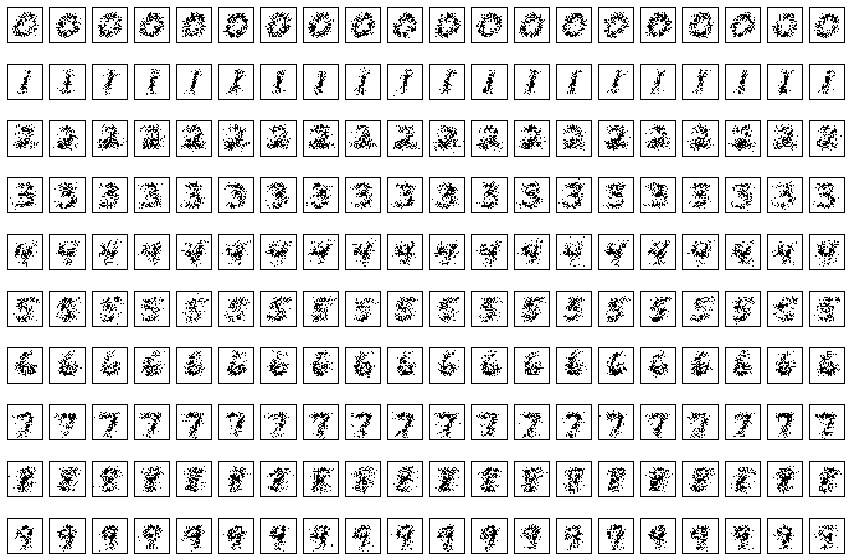

In [14]:
### STUDENT START ###
def P10(num_examples):
    # fit a bernoulliNB classifier with best value of alpha 0.01 from above analysis
    bern = BernoulliNB(binarize=0.5, alpha=0.01)
    bern.fit(mini_train_data,mini_train_labels)
    
    # Initialize a new plot and set the size
    plt.figure(figsize=(15, 10))

    # Set a black on white colormap.
    plt.rc('image', cmap='binary', interpolation='none')

    count = 0
    for digit in range(10):
        # for each class/digit, get the feature probabilities from fit model
        # and reshape it to 28*28 matrix for rendering the plot
        pb = np.exp(bern.feature_log_prob_)[digit].reshape(28,28)
        for index in range(num_examples):
            # generate random numbers from a uniform distribution
            ex = np.random.rand(28,28)
            # if the random number is less than the corresponding feature probability,
            # then the value is 1 else it's 0. Thus, we get a binary matrix which will be our generated digit
            ex_fig = ex < pb
            # create subplots with 10 rows and 20 columns
            ax = plt.subplot(10, 20, count + 1)
            plt.setp(ax, xticks=(), yticks=())
            # plot the generated digit one by one
            plt.imshow(ex_fig)
            count += 1

P10(20)
### STUDENT END ###

ANSWER: The generated digits are not as clear as training digits as each pixel value is either 0 or 1.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [15]:
### STUDENT START ###
def P11(buckets, correct, total):

    # train a BernoulliNB model with 0.01 alpha
    bern = BernoulliNB(binarize=0.5, alpha=0.01)
    bern.fit(mini_train_data,mini_train_labels)
    # posterior = P(Y|X)
    pb = bern.predict_proba(dev_data)
    pred = bern.predict(dev_data)

    # find the bucket for each prediction probability
    # initialize the probability bucket matrix with the minimum value in the buckets list
    pb_bucket = np.zeros(pb.shape) + np.array(buckets).min()
    for i in range(pb.shape[0]):
        for j in range(pb.shape[1]):
            for k in range(len(buckets)):
                if pb[i][j]> buckets[k]:
                    pb_bucket[i][j] = buckets[k]
    #             if pred3[i] == dev_labels[i]:
    #                 correct[k] +=1
    #             total[k] +=1
    
    # update total and correct counters
    for i in range(len(pred)):
        k = int(pred[i])
        # for each prediction, find its bucket
        b = buckets.index(pb_bucket[i, k])
        # if the prediction is correct, then add 1 to the corresponding bucket in the correct list
        if pred[i] == dev_labels[i]:
            correct[b] += 1
        # always add 1 to the corresponding bucket in the total list
        total[b] += 1
    return correct, total

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]
P11(buckets, correct, total)

# calculate the accuracy for each bucket
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))
                
### STUDENT END ###


p(pred) <= 0.5000000000000    total =  30    accuracy = 0.200
p(pred) <= 0.9000000000000    total =  86    accuracy = 0.465
p(pred) <= 0.9990000000000    total =  85    accuracy = 0.612
p(pred) <= 0.9999900000000    total =  58    accuracy = 0.690
p(pred) <= 0.9999999000000    total =  61    accuracy = 0.754
p(pred) <= 0.9999999990000    total =  73    accuracy = 0.877
p(pred) <= 0.9999999999900    total =  75    accuracy = 0.840
p(pred) <= 0.9999999999999    total = 532    accuracy = 0.953
p(pred) <= 1.0000000000000    total =   0    accuracy = 0.000


ANSWER: As the accuracy is positively correlated to the posterior probability, this is a weakly calibrated classifier.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [49]:
# Up till now, we use individual pixel values as the values. I try to look at groups of pixel values
# i.e. sum of column and sum of row pixel values. The new features look at some pixel values together
# which will also mitigate outlier impact or remove some noises.
# The new features are also scaled to range [0, 1], consistent with existing features.

def add_features(data):
    # initialize a matrix for storing the column sum and row sum of all examples
    sum_features = np.zeros((data.shape[0],56))
    # for each example, get the sum of columns and sum of features
    for i in range(data.shape[0]):
        # extract one example and reshape it to matrix
        a = data[i].reshape((28,28))
        # calculate sum of each row and each column
        row_sum = a.sum(axis=1) # by row
        col_sum = a.sum(axis=0) # by column
        # combine row sum and column sum features 
        sum_features[i] = np.hstack((row_sum, col_sum))
    # combine new features with original data set
    # also convert new feature values to range [0, 1]
    new_data = np.hstack((data, sum_features/28))
    return new_data

# add features for the training data set
new_mini_train_data = add_features(mini_train_data)
# add features for the dev data set
new_dev_data = add_features(dev_data)

# initialize BernoulliNB classifiers
# baseline
bern = BernoulliNB(binarize=0.5, alpha=0.01)
bern.fit(mini_train_data,mini_train_labels)
print("Before adding new features, the baseline accuracy is %.3f." % bern.score(dev_data,dev_labels))
# model with new features
bern2 = BernoulliNB(binarize=0.5, alpha=0.01)
bern2.fit(new_mini_train_data,mini_train_labels)
print("After add features of column sum and row sum, the accuracy has been improved to %.3f." 
      % bern2.score(new_dev_data,dev_labels))

Before adding new features, the baseline accuracy is 0.818.
After add features of column sum and row sum, the accuracy has been improved to 0.825.
